1. Write code to implement a 2-class nearest-means classifier for data that has 2 features. (In part (e) below you will also need to run the case of data that has just 1 feature.) You are given 3 datasets, each of which is divided into a training set and test set.
dataset1_train.csv, dataset1_test.csv,
dataset2_train.csv, dataset2_test.csv,
dataset3_train.csv, dataset3_test.csv
Each csv file has one row for each data point, and one column for each feature; except the last column contains the class labels (1 or 2).
Note that for a nearest-means classifier, the training or learning phase consists merely of computing the class means; and the classification of each data point can be done by finding
which class mean is closer.

In [552]:
# Importing the required libraries:
import pandas as pds
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from plotDecBoundaries import plotDecBoundaries

In [553]:
# Reading the csv file using pandas and storing the dataset into respective data frames:
df1_test = pds.read_csv('dataset1_test.csv')
df1_train = pds.read_csv('dataset1_train.csv')
df2_test = pds.read_csv('dataset2_test.csv')
df2_train = pds.read_csv('dataset2_train.csv')
df3_test = pds.read_csv('dataset3_test.csv')
df3_train = pds.read_csv('dataset3_train.csv')

Displaying the first five rows in each dataset file:

In [554]:
df1_train.head()

,2.199291318455960820e+00,3.690399294158712706e+00,1.000000000000000000e+00
0,0.472634,-0.709271,2.0
1,-0.026662,-1.335827,2.0
2,-0.116866,-1.336345,2.0
3,2.100909,1.143771,2.0
4,2.512397,1.345972,2.0


In [555]:
df1_test.head()

,1.226844523717489865e+00,2.737906870864166842e-01,2.000000000000000000e+00
0,-0.929775,0.300098,1.0
1,0.220924,0.835073,1.0
2,0.783772,-0.233020,2.0
3,2.116507,0.728805,2.0
4,0.002064,-1.187643,2.0


In [556]:
df2_train.head()

,4.936546812986483124e-01,9.059484132037098902e-01,1.000000000000000000e+00
0,0.872053,-0.355721,2.0
1,-0.009021,0.132694,2.0
2,-0.578481,1.000596,1.0
3,-0.438395,1.038901,1.0
4,2.365306,-0.136852,2.0


In [557]:
df2_test.head()

,-7.004360146863475300e-02,-1.184574247464941360e-01,2.000000000000000000e+00
0,-0.824375,0.892066,1.0
1,1.384810,0.016317,2.0
2,0.304828,0.286498,2.0
3,1.651588,0.902572,1.0
4,0.249487,0.150905,2.0


In [558]:
df3_test.head()

,6.248327246921626665e-01,1.394104810933641581e+00,2.000000000000000000e+00
0,2.976187,-0.119177,1.0
1,0.489271,-2.653542,1.0
2,0.159336,1.642712,2.0
3,0.059028,0.772479,2.0
4,1.188627,0.430223,1.0


In [559]:
df3_train.head()

,-3.182181156462917215e+00,1.966440828370777494e+00,1.000000000000000000e+00
0,0.245498,1.287367,2.0
1,0.480500,0.785206,2.0
2,0.338015,-0.906211,1.0
3,0.396452,1.345380,2.0
4,0.179873,0.277002,2.0


Displaying statistical information of the datasets:

In [560]:
df1_train.describe()

,2.199291318455960820e+00,3.690399294158712706e+00,1.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.548602,0.523083,1.505051
std,1.171185,1.151679,0.502519
min,-2.292968,-2.565868,1.000000
25%,-0.281355,-0.203310,1.000000
50%,0.559263,0.592935,2.000000
75%,1.360165,1.362689,2.000000
max,3.447650,3.283017,2.000000


In [561]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   2.199291318455960820e+00  99 non-null     float64
 1   3.690399294158712706e+00  99 non-null     float64
 2   1.000000000000000000e+00  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [562]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   1.226844523717489865e+00  99 non-null     float64
 1   2.737906870864166842e-01  99 non-null     float64
 2   2.000000000000000000e+00  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [563]:
df1_test.describe()

,1.226844523717489865e+00,2.737906870864166842e-01,2.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.497148,0.501499,1.494949
std,1.103996,1.225549,0.502519
min,-1.806468,-2.268844,1.000000
25%,-0.323696,-0.228264,1.000000
50%,0.508559,0.471312,1.000000
75%,1.190355,1.335118,2.000000
max,2.866262,3.029122,2.000000


In [564]:
df2_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   4.936546812986483124e-01  99 non-null     float64
 1   9.059484132037098902e-01  99 non-null     float64
 2   1.000000000000000000e+00  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [565]:
df2_train.describe()

,4.936546812986483124e-01,9.059484132037098902e-01,1.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.339926,0.474754,1.505051
std,1.312513,0.536922,0.502519
min,-3.618054,-0.494060,1.000000
25%,-0.559349,-0.016009,1.000000
50%,0.294120,0.207284,2.000000
75%,1.310090,1.018522,2.000000
max,2.904524,1.221371,2.000000


In [566]:
df2_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   -7.004360146863475300e-02  99 non-null     float64
 1   -1.184574247464941360e-01  99 non-null     float64
 2   2.000000000000000000e+00   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [567]:
df2_test.describe()

,-7.004360146863475300e-02,-1.184574247464941360e-01,2.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.525484,0.525038,1.494949
std,1.400118,0.510716,0.502519
min,-2.360086,-0.272534,1.000000
25%,-0.363097,0.023980,1.000000
50%,0.463198,0.726466,1.000000
75%,1.438459,1.016077,2.000000
max,5.342143,1.318235,2.000000


In [568]:
df3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   -3.182181156462917215e+00  99 non-null     float64
 1   1.966440828370777494e+00   99 non-null     float64
 2   1.000000000000000000e+00   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [569]:
df3_train.describe()

,-3.182181156462917215e+00,1.966440828370777494e+00,1.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.261897,0.558881,1.505051
std,1.403009,1.182601,0.502519
min,-4.274687,-3.211368,1.000000
25%,-0.132703,0.141389,1.000000
50%,0.452574,0.782891,2.000000
75%,0.815691,1.208065,2.000000
max,4.185900,3.601428,2.000000


In [570]:
df3_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   6.248327246921626665e-01  99 non-null     float64
 1   1.394104810933641581e+00  99 non-null     float64
 2   2.000000000000000000e+00  99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


In [571]:
df1_test.describe()

,1.226844523717489865e+00,2.737906870864166842e-01,2.000000000000000000e+00
count,99.000000,99.000000,99.000000
mean,0.497148,0.501499,1.494949
std,1.103996,1.225549,0.502519
min,-1.806468,-2.268844,1.000000
25%,-0.323696,-0.228264,1.000000
50%,0.508559,0.471312,1.000000
75%,1.190355,1.335118,2.000000
max,2.866262,3.029122,2.000000


In [572]:
# Converting the dataframes to arrays:
def dataframe(dframe):
  array = dframe.to_numpy()
  feature_array = np.vstack((array[:, 0], array[:, 1])).T
  labels = array[:, -1] # Extracting the labels from each dataset. 
  return feature_array, labels

In [573]:
# Calculating the mean:
def mean(x, y):
  num = np.count_nonzero(y == 1.0)
  diff = len(y) - num
  x_1 = np.zeros((num, x.shape[1]))
  x_2 = np.zeros((diff, x.shape[1]))
  i = 0
  j = 0
  
  for ele in range(len(y)):
    
    if y[ele] == 1.0:
      x_1[i] = x[ele]
      i += 1
    else:
      x_2[j] = x[ele]
      j +=1
  
  if x.shape[1] > 1:
    mean = np.zeros((2, 2))
    mean[0][0] = np.mean(x_1[:, 0])
    mean[0][1] = np.mean(x_1[:, 1])
    mean[1][0] = np.mean(x_2[:, 0])
    mean[1][1] = np.mean(x_2[:, 1])
  else:
    mean = np.zeros(2)
    mean[0] = np.mean(x_1)
    mean[1] = np.mean(x_2)
  
  return mean

In [574]:
# Calculating the Euclidean distance:
def distance(x, y):
  dis = math.sqrt((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2)
  return dis

In [575]:
# Calculating the error in classification:
def error(x, y, mean):
  misclassification = 0.0
  
  for ele in range(len(x)):
    flag = 1.0
    mean_dis_1 = distance(x[ele], mean[0])
    mean_dis_2 = distance(x[ele], mean[1])

    if mean_dis_1 > mean_dis_2:
      flag = 2.0
    
    if flag != y[ele]:
      misclassification += 1

  accuracy = (misclassification / len(x)) * 100
  return accuracy 

**(a) Learning (training) and classification-** 
Use unnormalized data as supplied in the datasets. For each dataset (1, 2, and 3), do the following.
Compute the class means on the training data.
(i) Plot the training data (using different colors or symbols for the different classes), the class means, the decision boundary, and decision regions.
Classify all data points in the training set and in the test set, using the class means computed above.
(ii) Report the classification error rate on the training set, and separately on the test set.
Classification error rate = (Number of misclassified points) / (total number of points), expressed as percentage.

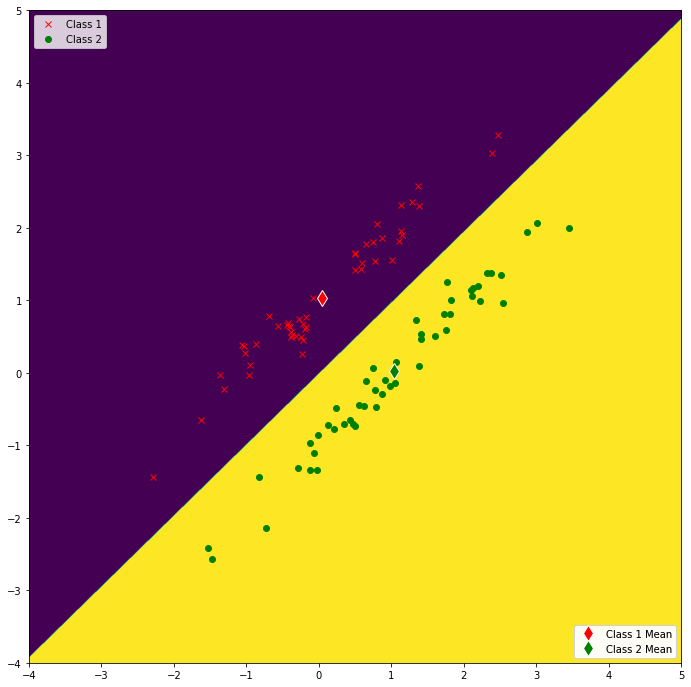

The classification error for training dataset-1 = 0.0 %


In [576]:
# Plotting 
train_f1, train_s1 = dataframe(df1_train)
mean_1 = mean(train_f1, train_s1) 
plotDecBoundaries(train_f1, train_s1, mean_1, fsize = (12, 12))
error_rate_1 = error(train_f1, train_s1, mean_1)
print("The classification error for training dataset-1 =", error_rate_1, "%")

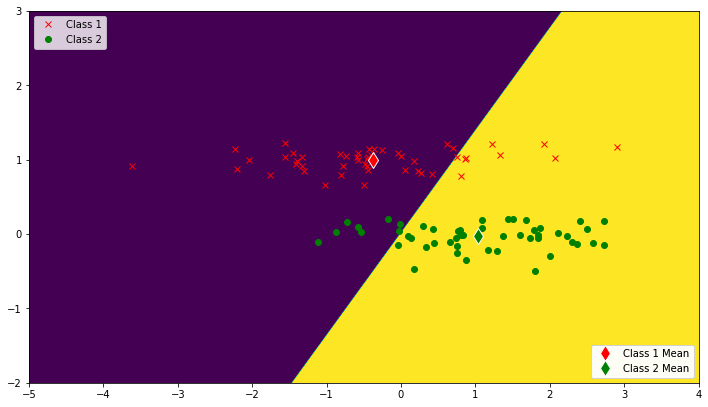

The classification error for training dataset-2 = 17.17171717171717 %


In [577]:
train_f2, train_s2 = dataframe(df2_train)
mean_2 = mean(train_f2, train_s2) 
plotDecBoundaries(train_f2, train_s2, mean_2, fsize = (12, 12))
error_rate_2 = error(train_f2, train_s2, mean_2)
print("The classification error for training dataset-2 =", error_rate_2, "%")

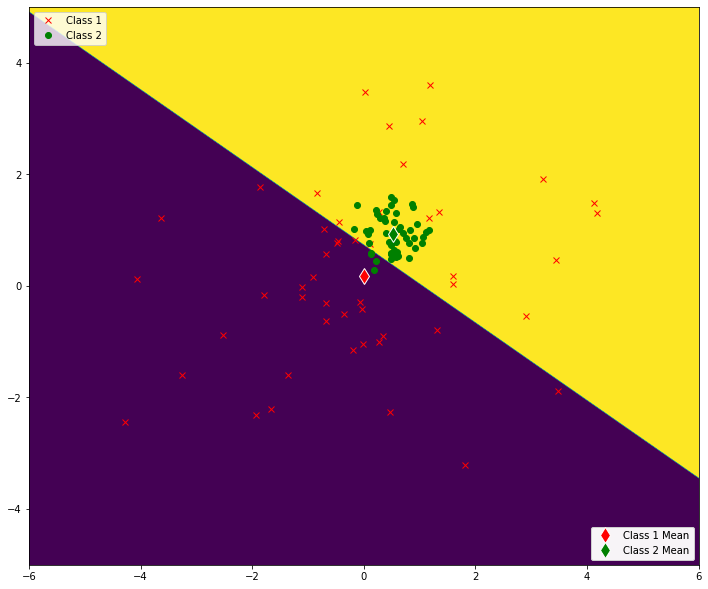

The classification error for training dataset-3 = 22.22222222222222 %


In [578]:
train_f3, train_s3 = dataframe(df3_train)
mean_3 = mean(train_f3, train_s3) 
plotDecBoundaries(train_f3, train_s3, mean_3, fsize = (12, 12))
error_rate_3 = error(train_f3, train_s3, mean_3)
print("The classification error for training dataset-3 =", error_rate_3, "%")

In [579]:
test_f1, test_s1 = dataframe(df1_test)
error_rate_test_1 = error(test_f1, test_s1, mean_1)
print("The classification error for testing dataset-1 =", error_rate_test_1, "%")

The classification error for testing dataset-1 = 0.0 %


In [580]:
test_f2, test_s2 = dataframe(df2_test)
error_rate_test_2 = error(test_f2, test_s2, mean_2)
print("The classification error for testing dataset-2 =", error_rate_test_2, "%")

The classification error for testing dataset-2 = 26.262626262626267 %


In [581]:
test_f3, test_s3 = dataframe(df3_test)
error_rate_test_3 = error(test_f3, test_s3, mean_3)
print("The classification error for testing dataset-3 =", error_rate_test_3, "%")

The classification error for testing dataset-3 = 23.232323232323232 %


**(c) Preprocessing: normalization-**
Standardize the data (so that each feature, across both classes combined, has sample mean = 0 and sample variance = 1). For each dataset, compute the normalizing parameters from the training data, and then use those parameter values to standardize the training data and test data. The result is the (standardized) data you will use for this part.
Repeat part (a), except on the normalized data.

In [582]:
# Normalizing the train and test dataset:
def normalize_train(x):
  m = np.mean(x[:, 0])
  variance = np.var(x[:, 0])
  standard_deviation = math.sqrt(variance)
  m_1 = np.mean(x[:, 1])
  variance_1 = np.var(x[:, 1])
  standard_deviation_1 = math.sqrt(variance_1)

  for i in range(len(x)):
    x[i][0] = (x[i][0] - m) / standard_deviation
    x[i][1] = (x[i][1] - m_1) / standard_deviation_1

  parameters = np.array([m, standard_deviation, m_1, standard_deviation_1])
  return x, parameters

def normalize_test(x, parameters):
  for i in range(len(x)):
    x[i][0] = (x[i][0] - parameters[0]) / parameters[1]
    x[i][1] = (x[i][1] - parameters[2]) / parameters[3]
  return x

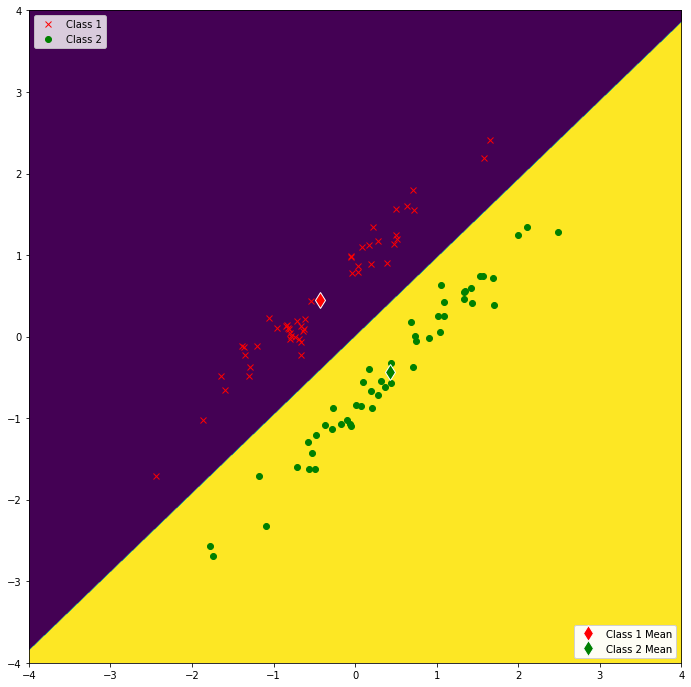

The classification error for normalized training dataset-1 = 0.0 %


In [583]:
#Plotting decision boundary and classification error rate for train set 1
train_f1, train_s1 = dataframe(df1_train)
train_fs1_norm, train_fs1_params = normalize_train(train_f1)
mean_1 = mean(train_fs1_norm, train_s1)
plotDecBoundaries(train_fs1_norm, train_s1, mean_1, fsize = (12, 12))
error_rate_1 = error(train_fs1_norm, train_s1, mean_1)
print("The classification error for normalized training dataset-1 =", error_rate_1,"%")

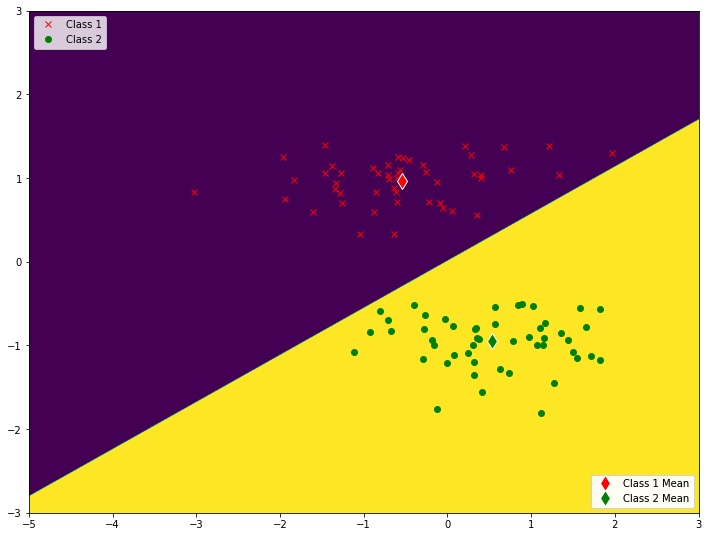

The classification error for normalized training dataset-2 = 0.0 %


In [584]:
train_f2, train_s2 = dataframe(df2_train)
train_fs2_norm, train_fs2_params = normalize_train(train_f2)
mean_2 = mean(train_fs2_norm, train_s2)
plotDecBoundaries(train_fs2_norm, train_s2, mean_2, fsize = (12, 12))
error_rate_2 = error(train_fs2_norm, train_s2, mean_2)
print("The classification error for normalized training dataset-2 =", error_rate_2,"%")

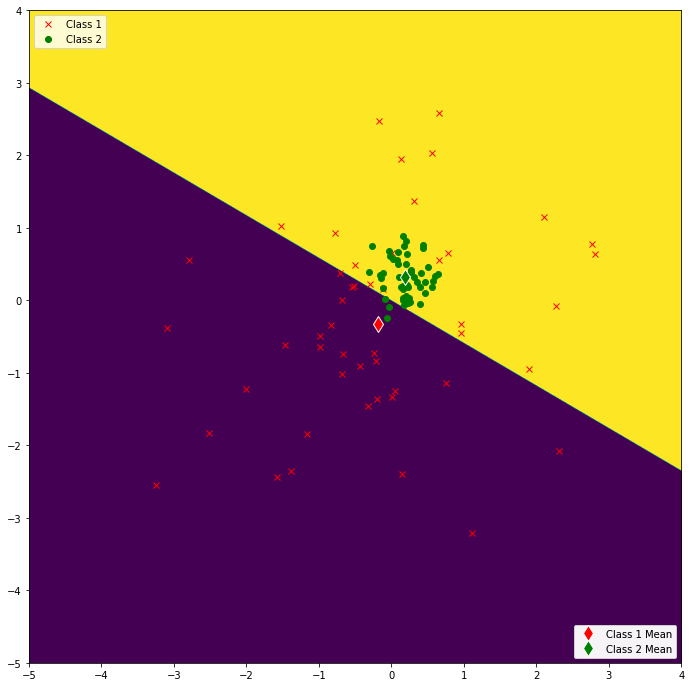

The classification error for normalized training dataset-3 = 24.242424242424242 %


In [585]:
train_f3, train_s3 = dataframe(df3_train)
train_fs3_norm, train_fs3_params = normalize_train(train_f3)
mean_3 = mean(train_fs3_norm, train_s3)
plotDecBoundaries(train_fs3_norm, train_s3, mean_3, fsize = (12, 12))
error_rate_3 = error(train_fs3_norm, train_s3, mean_3)
print("The classification error for normalized training dataset-3 =", error_rate_3,"%")

In [586]:
test_f1, test_s1 = dataframe(df1_test)
test_fs1_norm = normalize_test(test_f1, train_fs1_params)
error_rate_test_1 = error(test_fs1_norm, test_s1, mean_1)
print("The classification error for the normalized testing dataset-1 =", error_rate_test_1, "%")

The classification error for the normalized testing dataset-1 = 0.0 %


In [587]:
test_f2, test_s2 = dataframe(df2_test)
test_fs2_norm = normalize_test(test_f2, train_fs2_params)
error_rate_test_2 = error(test_fs2_norm, test_s2, mean_2)
print("The classification error for the normalized testing dataset-2 =", error_rate_test_2, "%")

The classification error for the normalized testing dataset-2 = 4.040404040404041 %


In [588]:
test_f3, test_s3 = dataframe(df3_test)
test_fs3_norm = normalize_test(test_f3, train_fs3_params)
error_rate_test_3 = error(test_fs3_norm, test_s3, mean_3)
print("The classification error for the normalized testing dataset-3 =", error_rate_test_3, "%")

The classification error for the normalized testing dataset-3 = 22.22222222222222 %


**(e) Feature transformation: feature reduction by projection-** 
For this part start with the standardized data. Reduce the number of features to 1 by using a projection transformation, as described below.
A projection transformation will project all data points onto the same line, to result in a new, 1D feature space.
For each (standardized) dataset, do the following:
To get a somewhat optimal result for the feature transformation, try different directions for the line by using the following brute-force technique on the training set:
Try 40 different vector directions 𝑟! to project onto, as follows:
𝑟! = (10,𝑚), m = 0,1,2,⋯,9
r" = (20 − m, 10), m = 10,11,12,⋯,29
𝑟! = (−10, 40 − 𝑚), m = 30,31,32,⋯,39
For each value of 𝑚, project all the training data points onto 𝑟!. The result will be a set data points in 1D (projected) feature space. Then train the 1D classifier by computing the class means. Next, classify all the training data points in the 1D feature space. To optimize the feature transformation, plot the training error rate vs. m. Report which value(s) of m give(s) the lowest training error. Call it m∗; if more than one value of m give the
lowest training error, then let m∗ be the lowest such m.
Also report 𝑟!∗ .
Then classify all the points in the test set in the 1D space for 𝑚 = 𝑚∗. Show the projected points, as well as the decision boundaries and regions, on a 2D plot (using the same axes as the other 2D plots), all for 𝑚 = 𝑚∗. Report the resulting test error.

In [589]:
def transformed_dataset(x, rm):
  transformed_x = np.dot(rm.T, x.T) / math.sqrt(np.dot(rm.T, rm)[0][0])
  return transformed_x.T

In [590]:
def error_1d(x, y, mean):
  misclassification = 0
  
  for ele in range(len(x)):
    flag = 1.0
    mean_dis_1 = abs(x[ele] - mean[0])
    mean_dis_2 = abs(x[ele] - mean[1])
    
    if mean_dis_1 > mean_dis_2:
      flag = 2.0
    
    if flag != y[ele]:      
      misclassification += 1

  accuracy = (misclassification / len(x)) * 100
  return accuracy

In [591]:
def projection_1d(x, y):
  accuracy_list = []
  mean_matrix = np.zeros((len(x), 2))
  i = 0
  for m in range(40):
    
    if m < 10:
      rm = np.array([[10], [m]])
    
    elif m < 30:
      rm = np.array([[20 - m], [10]])
    
    else:
      rm = np.array([[-10], [40 - m]])

    transformed_x = transformed_dataset(x, rm)
    mean_transformed_x = mean(transformed_x, y)
    error_rate = error_1d(transformed_x, y, mean_transformed_x)
    accuracy_list.append(error_rate)

  plt.plot(range(40), accuracy_list)
  plt.ylabel("Error rate (%)")
  plt.xlabel("m")
  plt.title("Error rate versus m")

  m_optimum = accuracy_list.index(min(accuracy_list))
  
  if m_optimum < 10:
    rm_optimum = np.array([[10], [m_optimum]])
  
  elif m_optimum < 30:
    rm_optimum = np.array([[20 - m_optimum], [10]])
  
  else:
    rm_optimum = np.array([[-10], [40 - m_optimum]])

  transformed_optimum_x = transformed_dataset(x, rm_optimum)
  mean_transformed_optimum_x = mean(transformed_optimum_x, y)
  return m_optimum, rm_optimum, mean_transformed_optimum_x

In [592]:
def projection_test(x, y, rm, mean):
  transformed_x = transformed_dataset(x, rm)
  error_rate = error_1d(transformed_x, y, mean)
  return error_rate, transformed_x

Optimum m =  28 	 Optimum Rm = [[-8]
 [10]]


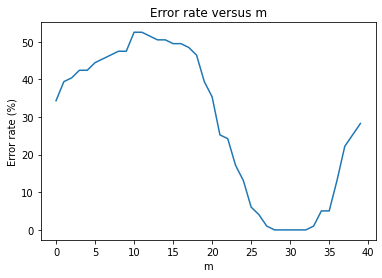

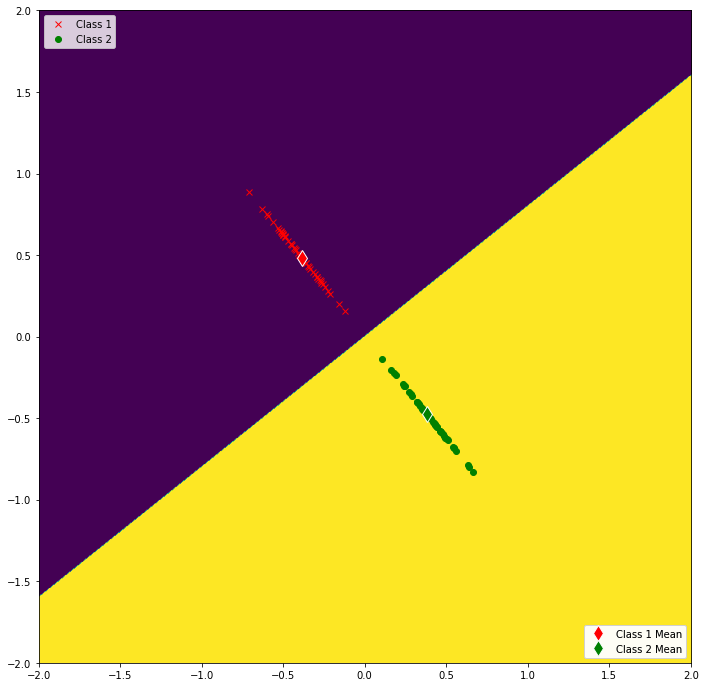

The classification error of transformed testing dataset-1 = 0.0 %


In [593]:
m_optimum_1, rm_optimum_1, mean_transformed_optimum_x1 = projection_1d(train_fs1_norm, train_s1)
error_rate_test_1, transformed_test_x1 = projection_test(test_fs1_norm, test_s1, rm_optimum_1, mean_transformed_optimum_x1)
print("Optimum m = ", m_optimum_1,"\t Optimum Rm =", rm_optimum_1)
test_f1_inverse_transformed = np.zeros((99, 2))
mean_inverse_transformed_1 = np.zeros((2, 2))

for i in range(len(transformed_test_x1)):
  test_f1_inverse_transformed[i] = (transformed_test_x1[i] * rm_optimum_1).T / math.sqrt(np.dot(rm_optimum_1.T, rm_optimum_1)[0][0])

for i in range(len(mean_transformed_optimum_x1)):
  mean_inverse_transformed_1[i] = (mean_transformed_optimum_x1[i] * rm_optimum_1).T / math.sqrt(np.dot(rm_optimum_1.T, rm_optimum_1)[0][0])

plotDecBoundaries(test_f1_inverse_transformed, test_s1, mean_inverse_transformed_1, fsize = (12, 12))
print("The classification error of transformed testing dataset-1 =", error_rate_test_1, "%")

Optimum m =  18 	 Optimum Rm = [[ 2]
 [10]]


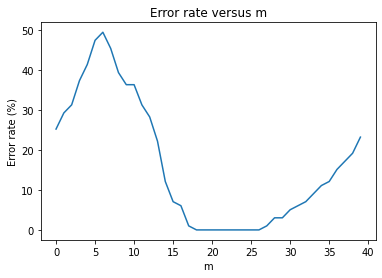

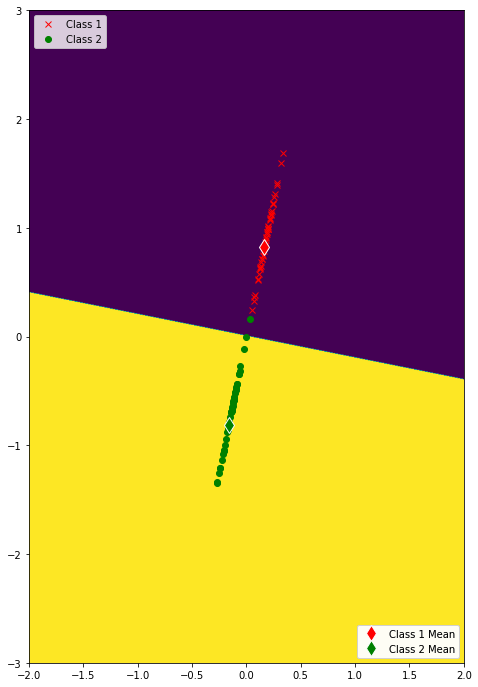

The classification error of transformed testing dataset-2 = 1.0101010101010102 %


In [594]:
m_optimum_2, rm_optimum_2, mean_transformed_optimum_x2 = projection_1d(train_fs2_norm, train_s2)
error_rate_test_2, transformed_test_x2 = projection_test(test_fs2_norm, test_s2, rm_optimum_2, mean_transformed_optimum_x2)
print("Optimum m = ", m_optimum_2,"\t Optimum Rm =", rm_optimum_2)
test_f2_inverse_transformed = np.zeros((99, 2))
mean_inverse_transformed_2 = np.zeros((2, 2))

for i in range(len(transformed_test_x2)):
  test_f2_inverse_transformed[i] = (transformed_test_x2[i] * rm_optimum_2).T / math.sqrt(np.dot(rm_optimum_2.T, rm_optimum_2)[0][0])

for i in range(len(mean_transformed_optimum_x2)):
  mean_inverse_transformed_2[i] = (mean_transformed_optimum_x2[i] * rm_optimum_2).T / math.sqrt(np.dot(rm_optimum_2.T, rm_optimum_2)[0][0])

plotDecBoundaries(test_f2_inverse_transformed, test_s2, mean_inverse_transformed_2, fsize = (12, 12))
print("The classification error of transformed testing dataset-2 =", error_rate_test_2, "%")

Optimum m =  8 	 Optimum Rm = [[10]
 [ 8]]


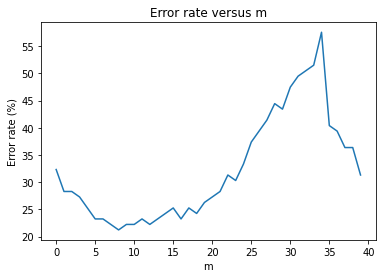

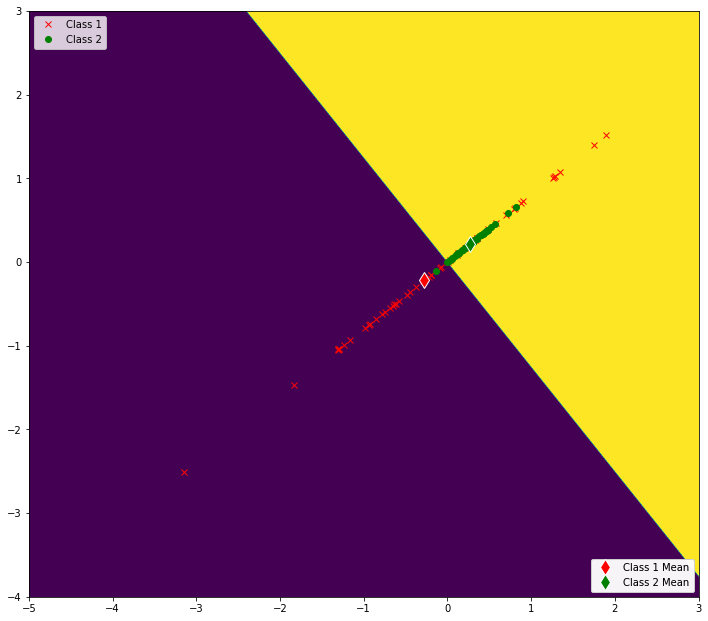

The classification error of transformed testing dataset-3 = 24.242424242424242 %


In [595]:
m_optimum_3, rm_optimum_3, mean_transformed_optimum_x3 = projection_1d(train_fs3_norm, train_s3)
error_rate_test_3, transformed_test_x3 = projection_test(test_fs3_norm, test_s3, rm_optimum_3, mean_transformed_optimum_x3)
print("Optimum m = ", m_optimum_3,"\t Optimum Rm =", rm_optimum_3)
test_f3_inverse_transformed = np.zeros((99, 2))
mean_inverse_transformed_3 = np.zeros((2, 2))

for i in range(len(transformed_test_x3)):
  test_f3_inverse_transformed[i] = (transformed_test_x3[i] * rm_optimum_3).T / math.sqrt(np.dot(rm_optimum_3.T, rm_optimum_3)[0][0])

for i in range(len(mean_transformed_optimum_x3)):
  mean_inverse_transformed_3[i] = (mean_transformed_optimum_x3[i] * rm_optimum_3).T / math.sqrt(np.dot(rm_optimum_3.T, rm_optimum_3)[0][0])

plotDecBoundaries(test_f3_inverse_transformed, test_s3, mean_inverse_transformed_3, fsize = (12, 12))
print("The classification error of transformed testing dataset-3 =", error_rate_test_3, "%")